In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

x_train = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998/dataset/train",
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary'
)

x_test = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998/dataset/test",
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary'
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/SI-GuidedProject-49403-1652770998/dataset/train'

In [ ]:
model =Sequential()

# Convolutional layer and maxpool layer 1
model.add(Conv2D(512,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
# Output layer with single neuron which gives 0 for Cat or 1 for Dog
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 126, 126, 512)     14336     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 63, 63, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 61, 61, 512)       2359808   
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 30, 30, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 28, 28, 256)       1179904   
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 14, 14, 256)    

In [ ]:
model.fit(x_train,  epochs=40, validation_data=x_test)

Epoch 1/40
321/321 [==============================] - 17s 52ms/step - loss: 0.6940 - accuracy: 0.5514 - val_loss: 0.7119 - val_accuracy: 0.5000
Epoch 2/40
321/321 [==============================] - 17s 52ms/step - loss: 0.6930 - accuracy: 0.5327 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/40
321/321 [==============================] - 17s 52ms/step - loss: 0.6768 - accuracy: 0.5382 - val_loss: 0.6528 - val_accuracy: 0.4938
Epoch 4/40
321/321 [==============================] - 17s 51ms/step - loss: 0.6337 - accuracy: 0.5701 - val_loss: 0.6113 - val_accuracy: 0.6875
Epoch 5/40
321/321 [==============================] - 16s 51ms/step - loss: 0.6157 - accuracy: 0.6199 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 6/40
321/321 [==============================] - 16s 51ms/step - loss: 0.5836 - accuracy: 0.6651 - val_loss: 0.5302 - val_accuracy: 0.7250
Epoch 7/40
321/321 [==============================] - 17s 52ms/step - loss: 0.5992 - accuracy: 0.6830 - val_loss: 0.5385 - val_accuracy:

In [ ]:
model.save("/content/drive/MyDrive/SI-GuidedProject-49403-1652770998/iceberg.h5")

In [9]:
# @title Default title text
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import os

path = "/content/drive/MyDrive/"
for root, dirs, files in os.walk(path):
    print(root)
    if 'train' in dirs and 'test' in dirs:
        print("✅ Found dataset path:", root)


/content/drive/MyDrive/
/content/drive/MyDrive/Certificates
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset
✅ Found dataset path: /content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Ship
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Iceberg
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train/Iceberg
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train/Ship
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/Flask
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/Flask/__pycache__
/content/drive/MyDrive/SI-GuidedProject-49403-1652

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

x_train = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998/dataset/train",
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary'
)

x_test = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998/dataset/test",
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary'
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/SI-GuidedProject-49403-1652770998/dataset/train'

In [16]:
import os

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    print(root)


/content/drive/MyDrive
/content/drive/MyDrive/Certificates
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Ship
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Iceberg
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train/Iceberg
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train/Ship
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/Flask
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/Flask/__pycache__
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/Flask/static
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/Flask/

In [18]:
/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train


NameError: name 'content' is not defined

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

x_train = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train",
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary'
)

x_test = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test",
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary'
)


Found 1284 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Start training!
history = model.fit(x_train, validation_data=x_test, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 455s 1s/step - accuracy: 0.5194 - loss: 0.7266 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5637 - loss: 0.6890 - val_accuracy: 0.7312 - val_loss: 0.5928
Epoch 3/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6240 - loss: 0.6214 - val_accuracy: 0.7406 - val_loss: 0.5164
Epoch 4/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6909 - loss: 0.5555 - val_accuracy: 0.7469 - val_loss: 0.4611
Epoch 5/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7652 - loss: 0.4559 - val_accuracy: 0.7969 - val_loss: 0.4265
Epoch 6/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8081 - loss: 0.3867 - val_accuracy: 0.8156 - val_loss: 0.3926
Epoch 7/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9129 - loss: 0.2340 - val_accuracy: 0.8313 - val_loss: 0.4069
Epoch 8/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9577 - loss: 0.1322 - val_accu

In [19]:
import os

path = "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/train"

# Check if path exists
print("✅ Exists" if os.path.exists(path) else "❌ Not found")

# List subfolders
print("Subfolders:", os.listdir(path))


✅ Exists
Subfolders: ['Iceberg', 'Ship']


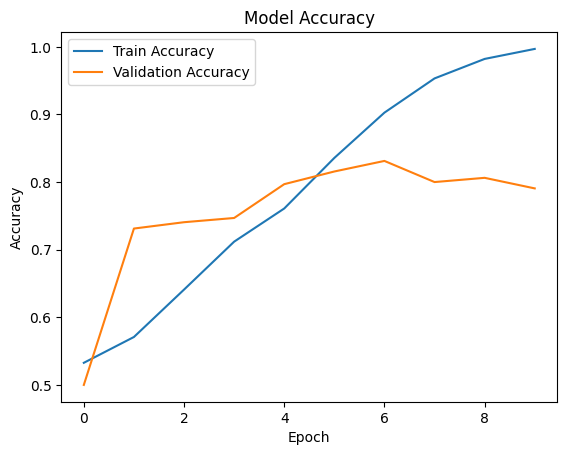

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [23]:
model.save("/content/drive/MyDrive/iceberg_model.h5")
print("✅ Model saved to your Google Drive!")


✅ Model saved to your Google Drive!


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image
img_path = "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Iceberg/iceberg001.jpg"  # Change this path to your test image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
prediction = model.predict(img_array)

# Show result
if prediction[0][0] >= 0.5:
    print("🚢 It's a Ship")
else:
    print("🧊 It's an Iceberg")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Iceberg/iceberg001.jpg'

In [25]:
import os

test_path = "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Iceberg"

# List all files
for file in os.listdir(test_path):
    print(file)


f178.png
f183.png
f201.png
f192.png
f193.png
f195.png
f210.png
f206.png
f207.png
f209.png
f202.png
f211.png
f223.png
f213.png
f216.png
f224.png
f225.png
f230.png
f229.png
f231.png
f228.png
f236.png
f234.png
f238.png
f237.png
f244.png
f242.png
f245.png
f241.png
f239.png
f248.png
f252.png
f246.png
f251.png
f255.png
f253.png
f258.png
f257.png
f262.png
f268.png
f267.png
f266.png
f259.png
f269.png
f271.png
f274.png
f275.png
f276.png
f285.png
f281.png
f279.png
f282.png
f293.png
f299.png
f291.png
f298.png
f292.png
f300.png
f302.png
f305.png
f306.png
f311.png
f309.png
f307.png
f313.png
f308.png
f318.png
f315.png
f316.png
f319.png
f314.png
f328.png
f320.png
f323.png
f326.png
f325.png
f331.png
f334.png
f336.png
f335.png
f330.png
f348.png
f346.png
f347.png
f349.png
f340.png
f359.png
f358.png
f355.png
f352.png
f353.png
f366.png
f360.png
f367.png
f365.png
f361.png
f376.png
f373.png
f370.png
f368.png
f371.png
f380.png
f382.png
f379.png
f381.png
f386.png
f389.png
f391.png
f394.png
f390.png
f404.png
f

In [26]:
img_path = "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Iceberg/f178.png"


In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict using the model
prediction = model.predict(img_array)

# Show result
if prediction[0][0] >= 0.5:
    print("🚢 It's a Ship")
else:
    print("🧊 It's an Iceberg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
🚢 It's a Ship


In [28]:
img_path = "/content/drive/MyDrive/SI-GuidedProject-49403-1652770998-main/dataset/test/Iceberg/f193.png"


In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict using the model
prediction = model.predict(img_array)

# Show result
if prediction[0][0] >= 0.5:
    print("🚢 It's a Ship")
else:
    print("🧊 It's an Iceberg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
🚢 It's a Ship


In [30]:
model.save("/content/drive/MyDrive/iceberg_model.h5")
